In [56]:
from __future__ import print_function

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
rng = np.random

sess = tf.InteractiveSession()
# Parameters
learning_rate = 0.01
training_epochs = 20
display_step = 50
n_samples = 200



# Training Data
train_X = tf.random_uniform(shape=[n_samples], minval=1, maxval=100, dtype=tf.float32).eval()
train_Y = train_X * 2.5 + 12

optimizers = { 'Adam': tf.train.AdamOptimizer(),
            'Adadelta': tf.train.AdadeltaOptimizer(),
            'Adagrad': tf.train.AdagradOptimizer(learning_rate),
            'GradientDescent': tf.train.GradientDescentOptimizer(learning_rate),
#             'AdagradDA': tf.train.AdagradDAOptimizer(learning_rate, None),
            'Momentum' : tf.train.MomentumOptimizer(learning_rate, 0.01),
            'Ftrl': tf.train.FtrlOptimizer(learning_rate),
            'ProximalGradientDescent': tf.train.ProximalGradientDescentOptimizer(learning_rate),
            'ProximalAdagrad': tf.train.ProximalAdagradOptimizer(learning_rate),
            'RMSProp': tf.train.RMSPropOptimizer(learning_rate)
             }
errors = {}

for opt_name, opt in optimizers.iteritems():
    X = tf.placeholder(tf.float32)
    Y = tf.placeholder(tf.float32)
    W = tf.Variable(rng.randn(), name="weight")
    b = tf.Variable(rng.randn(), name="bias")
    pred = W * X + b
    cost = tf.reduce_sum((pred - Y)**2) / (2 * n_samples)

    optimizer = opt.minimize(cost)
    errors[opt_name] = []
    init = tf.global_variables_initializer()
    sess.run(init)

    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        #if (epoch+1) % display_step == 0:
        c = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
        errors[opt_name].append(c)
        #print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
        #        "W=", sess.run(W), "b=", sess.run(b))

    print(opt_name + " optimization finished!")
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print(opt_name + " training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')



ProximalAdagrad optimization finished!
ProximalAdagrad training cost= 15983.2 W= -0.378698 b= 0.412904 

ProximalGradientDescent optimization finished!
ProximalGradientDescent training cost= 18.6899 W= 2.70145 b= 0.748899 

Adam optimization finished!
Adam training cost= 5588.04 W= 0.806404 b= 4.57877 

Adadelta optimization finished!
Adadelta training cost= 23188.9 W= -0.989962 b= -0.447817 

Ftrl optimization finished!
Ftrl training cost= 3325.4 W= 1.26227 b= 1.72704 

RMSProp optimization finished!
RMSProp training cost= 9.28295e-06 W= 2.49993 b= 11.9995 

Adagrad optimization finished!
Adagrad training cost= 4294.96 W= 1.08909 b= 0.605539 

GradientDescent optimization finished!
GradientDescent training cost= 24.3292 W= 2.72984 b= -0.836753 

Momentum optimization finished!
Momentum training cost= 20.0888 W= 2.70888 b= 0.337913 



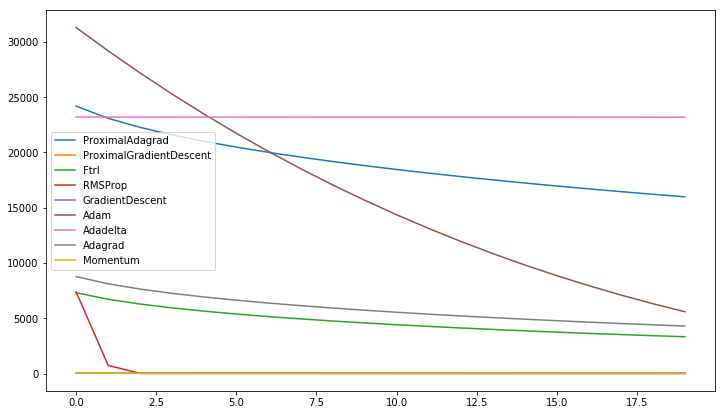

In [57]:

for opt_name, error in errors.iteritems():
    plt.plot(np.arange(training_epochs), error, label=opt_name)

plt.legend()
plt.rcParams["figure.figsize"] = [12., 7.]
plt.show()

In [58]:
errors

{'Adadelta': [23201.912,
  23201.248,
  23200.57,
  23199.887,
  23199.199,
  23198.518,
  23197.836,
  23197.148,
  23196.461,
  23195.775,
  23195.09,
  23194.402,
  23193.715,
  23193.029,
  23192.342,
  23191.654,
  23190.971,
  23190.285,
  23189.596,
  23188.91],
 'Adagrad': [8766.0703,
  8115.0,
  7637.9971,
  7250.915,
  6921.1611,
  6632.0171,
  6373.564,
  6139.335,
  5924.8413,
  5726.8198,
  5542.8062,
  5370.8887,
  5209.5493,
  5057.5537,
  4913.8882,
  4777.707,
  4648.2939,
  4525.0425,
  4407.416,
  4294.9644],
 'Adam': [31296.449,
  29190.27,
  27181.875,
  25271.266,
  23455.588,
  21731.471,
  20095.465,
  18544.275,
  17074.797,
  15684.103,
  14369.487,
  13128.398,
  11958.474,
  10857.48,
  9823.3184,
  8854.0049,
  7947.6289,
  7102.3594,
  6316.415,
  5588.0444],
 'Ftrl': [7306.436,
  6715.1982,
  6283.9912,
  5935.4033,
  5639.4561,
  5380.7837,
  5150.2515,
  4941.9238,
  4751.6729,
  4576.4985,
  4414.1377,
  4262.8311,
  4121.1826,
  3988.064,
  3862.5376,